# Visualizing graphs overview

Even though the NetworkX package isn't primarily a drawing tool, basic drawing with capabilities with **Matplotlib** and the open-source **Graphviz** software package are included.

There are many useful methods for drawing graph in NetworkX, and you are going to learn basics of:

- **Draw methods**
- **Layouts**
- **Positions**
- **Graph styling**

Don't forget to check out **other examples** and **useful tips** which can help you style your graph.

## Draw methods

You can draw the graph using two drawing methods: `draw()` and `draw_networkx()`. With `draw()` you can draw a simple graph with no node labels or edge labels and using the full Matplotlib figure area and no axis labels by default, while `draw_networkx()` allows you to define more options and customize your graph.

Let's say we defined a complete bipartite graph as below:

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


K33 = nx.complete_bipartite_graph(3, 3)

To draw it with `draw()` method, we use the following code:

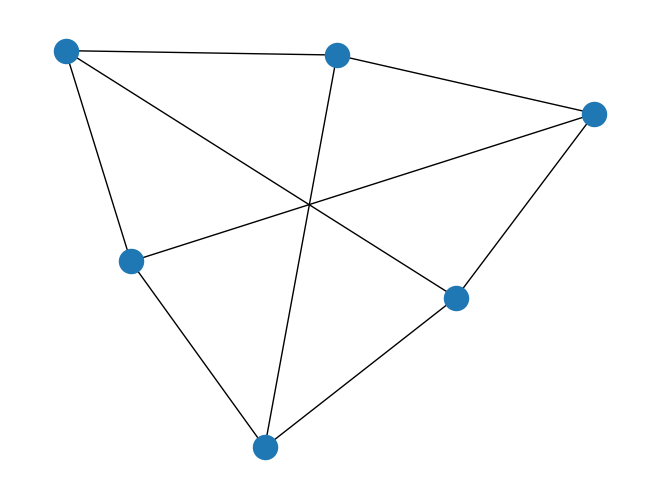

In [17]:
nx.draw(K33)
plt.show()

On the other hand, if we use `draw_networkx()` method, we need to run the following code for the default options:

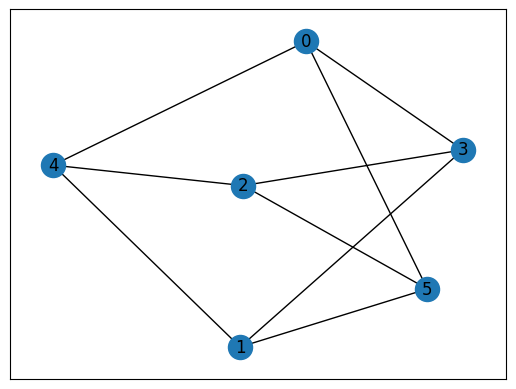

In [18]:
nx.draw_networkx(K33)
plt.show()

## Layouts

Graph layout will define node position for your graph drawing. There are a bunch of predefined layouts in NetworkX. The default one is called `spring_layout()` which poistions nodes using Fruchterman-Reingold force-directed algorithm.

Let's show the basic usage of graph layouts on a simple graph example.

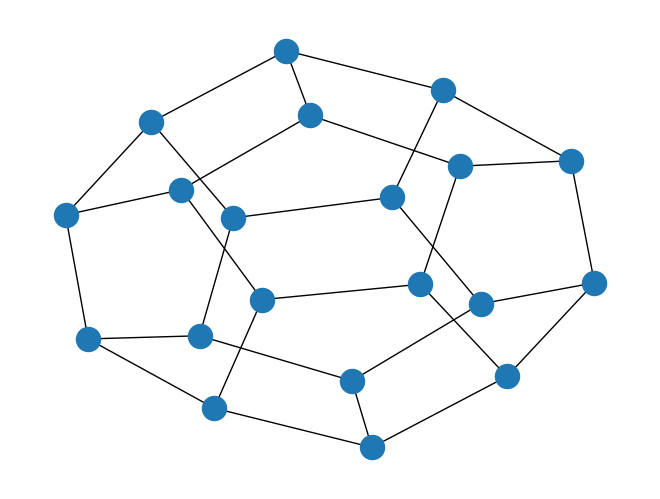

In [19]:
G = nx.dodecahedral_graph()
nx.draw(G)
plt.show()

Since we did not define any layout above, the default `spring_layout()` will be used.

If we want to draw the same graph with the `shell_layout()` that positiones nodes in concentric circles, we would use the following code:

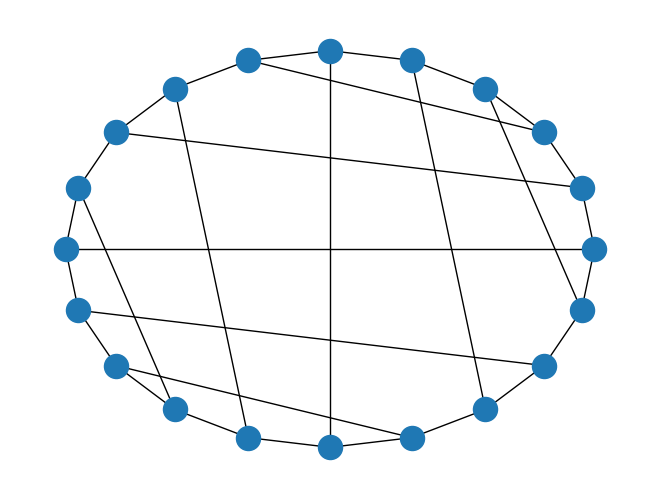

In [20]:
nx.draw(G, pos=nx.shell_layout(G))
plt.show()

For `spiral_layout()` run:

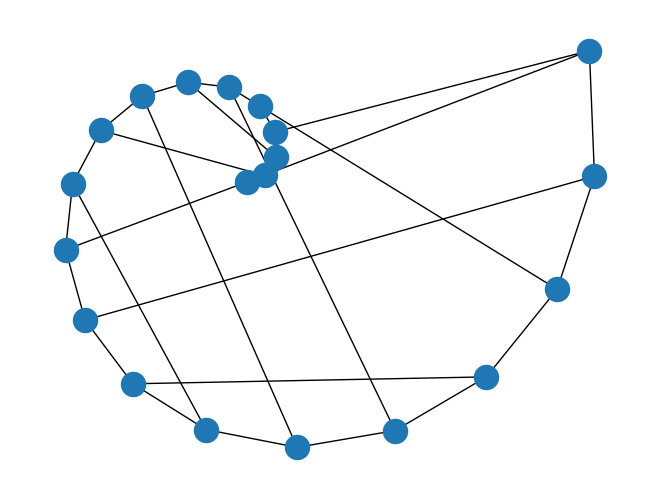

In [21]:
nx.draw(G, pos=nx.spiral_layout(G))
plt.show()

## Positions

You can use the exact positions of the nodes, instead of using predefined layouts. To do that, you need to define a dictionary with nodes as keys and positions as values.

**Example**

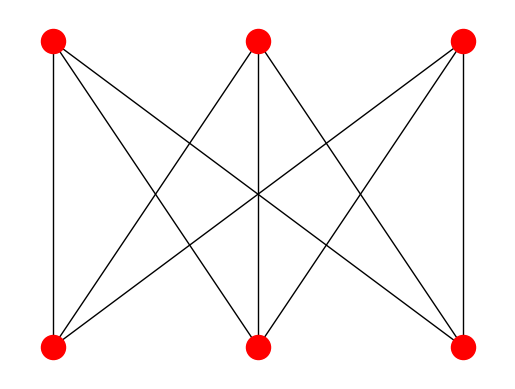

In [22]:
K33 = nx.complete_bipartite_graph(3, 3)

positions = {0: [-1, 1], 1: [0, 1], 2: [1, 1], 3: [-1, -1], 4: [0, -1], 5: [1, -1]}
ax = plt.figure().gca()
ax.set_axis_off()
options = {"node_size": 300, "node_color": "red"}
nx.draw_networkx(K33, positions, with_labels=False, **options)
plt.show()

## Graph styling

There are numerous styling options which let you customize your graph. For example, you can define colors of the nodes, draw node and edge labels, change font size, etc. Below you can check out a simple example of graph styling.

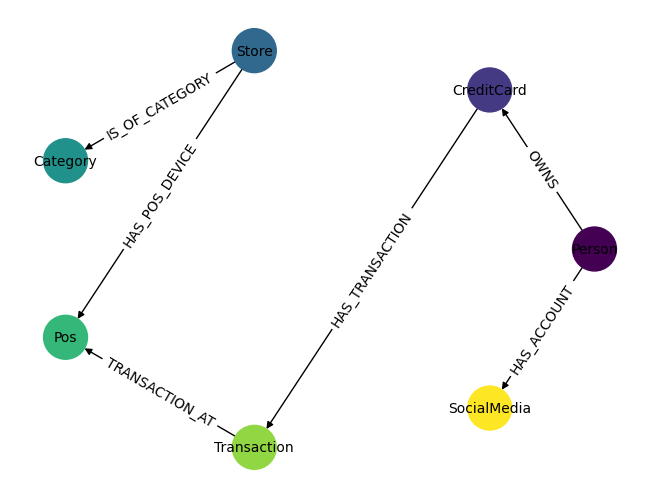

In [23]:
# Importing graphs from a file
G = nx.read_graphml("../data/graph.graphml")

# Defining the node colors
colors = np.linspace(0, 1, len(G.nodes))

pos = nx.circular_layout(G)
nx.draw(
    G, pos, node_size=1000, node_color=colors
)  # draws directed graph, nx.draw(G, arrows=False) for removing arrows

# Draw node labels and change font size
node_labels = nx.get_node_attributes(G, "label")
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, "type")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

## Other examples

Here is an example of how to draw a simple graph:

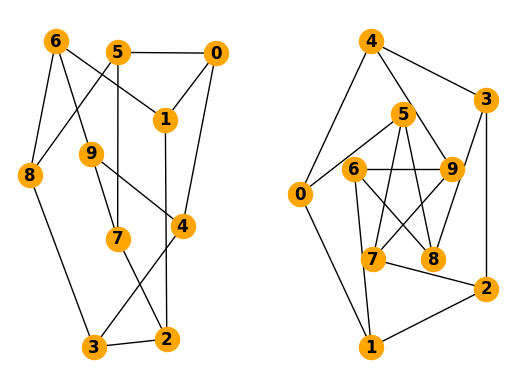

In [24]:
G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold', node_color='orange')
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold', node_color='orange')

plt.show()

Here are some other options for drawing graphs:

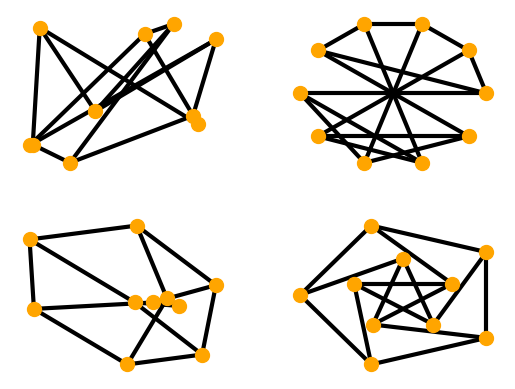

In [25]:
options = {
    'node_color': 'orange',
    'node_size': 100,
    'width': 3,
}

G = nx.petersen_graph()

plt.subplot(221)
nx.draw_random(G, **options)

plt.subplot(222)
nx.draw_circular(G, **options)

plt.subplot(223)
nx.draw_spectral(G, **options)

plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

plt.show()

## Useful tips

### How to draw directed graphs using NetworkX in Python?

By using the base class for directed graphs, [DiGraph](https://networkx.org/documentation/stable//reference/classes/digraph.html)(), we are able to draw a directed graph with arrows to indicate the direction of edges.

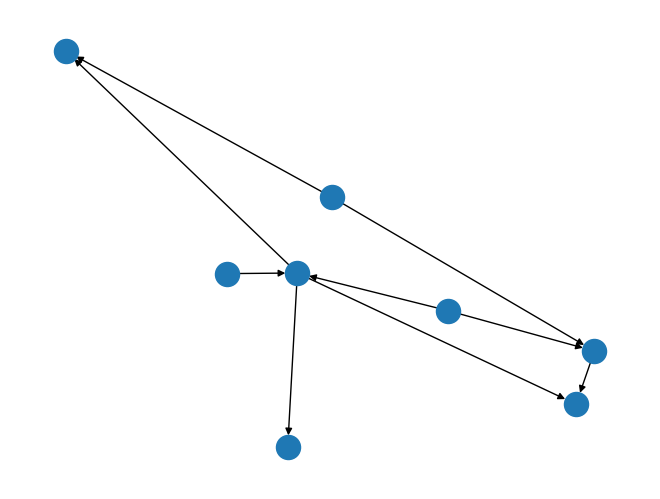

In [26]:
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

nx.draw(G)

plt.show()

### How to draw a NetworkX graph with labels?

If you want the node labels to be visible in your drawing, just add `with_labels=True` to the `nx.draw` call.

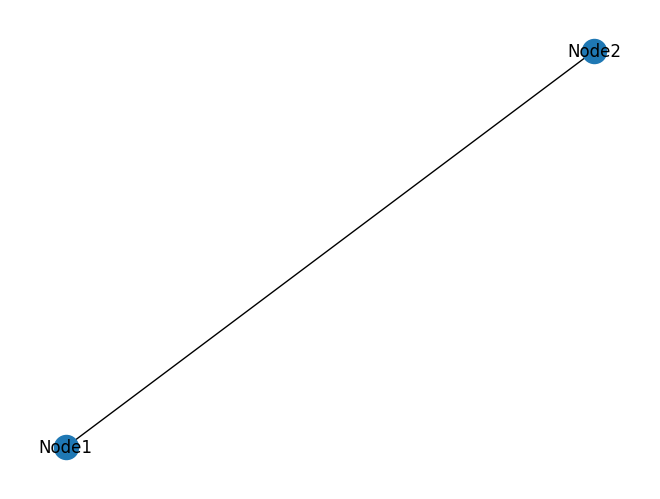

In [27]:
G=nx.Graph()
G.add_edge("Node1", "Node2")
nx.draw(G, with_labels = True)

plt.show()

### How to change the color and width of edges in NetworkX graphs according to edge attributes?

Dictionaries are the underlying data structure used for NetworkX graphs, and as of Python 3.7+ they maintain insertion order. You can use the `nx.get_edge_attributes()` function to retrieve edge attributes. For every run, we are guaranteed to have the same edge order.

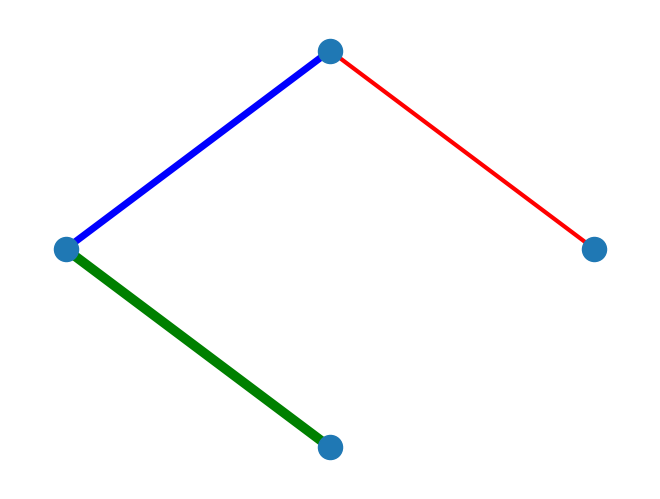

In [28]:
G = nx.Graph()
G.add_edge(1, 2, color='r' ,weight=3)
G.add_edge(2, 3, color='b', weight=5)
G.add_edge(3, 4, color='g', weight=7)

pos = nx.circular_layout(G)

colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()

nx.draw(G, pos, edge_color=colors, width=list(weights))

plt.show()

### How to color nodes in NetworkX graphs?

You need to define a color map that assigns a color to each node. For example, if were to color the first 15 nodes of a graph in `orange`, and the rest in `blue`, then the code would be:

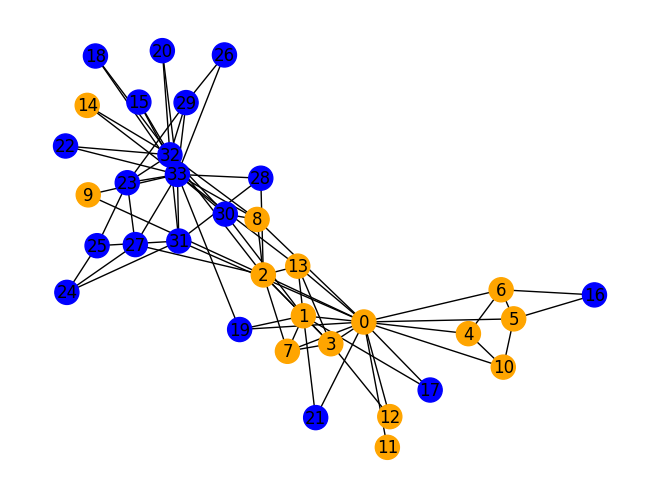

In [29]:
G = nx.karate_club_graph()
color_map = []
for node in G:
    if node < 15:
        color_map.append('orange')
    else: 
        color_map.append('blue')      

nx.draw(G, node_color=color_map, with_labels=True)

plt.show()

### How to color nodes in NetworkX graphs according to their attributes?

You need to define a color map that assigns a color to each node.

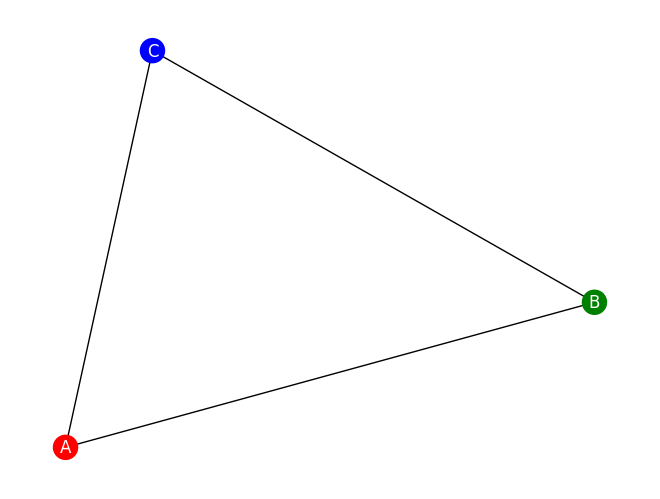

In [30]:
G = nx.Graph()
G.add_node('A', color='red')
G.add_node('B', color='green')
G.add_node('C', color='blue')

G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'C')])

colors = [node[1]['color'] for node in G.nodes(data=True)]

nx.draw(G, node_color=colors, with_labels=True, font_color='white')

plt.show()